# Autoencoder

In [1]:
import numpy as np
import tensorboard
import torch
import pytorch_lightning as pl
import matplotlib.pyplot as plt

from torch.utils.tensorboard import SummaryWriter
from sklearn.datasets import make_swiss_roll

from nnDataloader import get_data_loaders
from nnTrainer import train_autoencoder

%load_ext autoreload
%autoreload 2

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
writer = SummaryWriter("tensorboard/")
%load_ext tensorboard
%tensorboard --logdir tensorboard/

In [3]:
N_DATA  = 100000
N_TRAIN = int(N_DATA * 0.7)
N_VAL   = int(N_DATA * 0.15)
N_TEST  = int(N_DATA * 0.15)

Generate data in a reproducible way

In [4]:
pl.seed_everything(42)
DATA = torch.Tensor(make_swiss_roll(N_DATA)[0])

Global seed set to 42


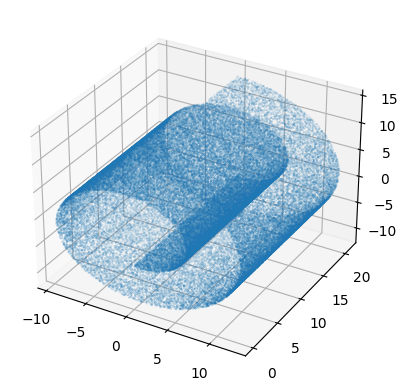

In [5]:
%matplotlib inline
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(*DATA.T, s=0.01)
plt.show()

In [6]:
train_val_test_loaders = get_data_loaders(DATA)

In [8]:
model, result = train_autoencoder(*train_val_test_loaders, latent_dim=2, data_dim=3)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type    | Params | In sizes | Out sizes
-----------------------------------------------------------
0 | encoder | Encoder | 67.3 K | [3]      | [2]      
1 | decoder | Decoder | 67.3 K | [2]      | [3]      
-----------------------------------------------------------
134 K     Trainable params
0         Non-trainable params
134 K     Total params
0.539     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 18/18 [00:01<00:00, 16.90it/s, loss=5.81, v_num=5]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 18/18 [00:01<00:00, 16.80it/s, loss=5.81, v_num=5]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Testing DataLoader 0: 100%|██████████| 9/9 [00:00<00:00, 123.24it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Testing DataLoader 0: 100%|██████████| 9/9 [00:00<00:00, 170.16it/s]
